In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import llops as yp
import llops.simulation as sim
import llops.operators as ops
import numpy as np

yp.setDefaultBackend('numpy')
yp.setDefaultDatatype('complex32')

In [2]:
# Define image size for other tests
image_size = [64, 128]

# Load object and crop to size
x = sim.brain(image_size)

eps = 1e-5

# Wavelet Operator

In [3]:
import pywt
wavelet_list = ['db1', 'haar', 'rbio1.1', 'bior1.1', 'bior4.4', 'sym12']
for wavelet_test in wavelet_list:
    # Wavelet Transform
    W = ops.WaveletTransform(image_size, wavelet_type=wavelet_test, use_cycle_spinning=False)

    # Check forward operation
    coeffs = pywt.wavedecn(x, wavelet=wavelet_test)
    x_wavelet, coeff_slices = pywt.coeffs_to_array(coeffs)
    assert yp.sum(yp.abs(yp.changeBackend(W * x, 'numpy') - x_wavelet)) < eps, "Difference %.6e"

    # Check inverse operation
    coeffs_from_arr = pywt.array_to_coeffs(x_wavelet, coeff_slices)
    cam_recon = pywt.waverecn(coeffs_from_arr, wavelet=wavelet_test)
    assert yp.sum(yp.abs(W.H * W * x - x)) < 1e-2

    # Ensure that the wavelet transform isn't just identity (weird bug)
    if W.shape[1] is yp.size(x):
        assert yp.sum(yp.abs(W * yp.vec(x) - yp.vec(x))) > 1e-2, "%s" % wavelet_test

    # Check gradient 
    W.gradient_check()

    # Render forward model
    W.latex()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Wavelet Cycle Spinning

In [4]:
# Define test
wavelet_test = 'db1'
n_samples = 3

# Wavelet Transform
W = ops.WaveletTransform(image_size, wavelet_type=wavelet_test, use_cycle_spinning=True)
for _ in range(n_samples):
    assert yp.sum(yp.abs(W.H * W * x - x)) < 1e-2

# Wavelet Level Normalization

<IPython.core.display.Javascript object>


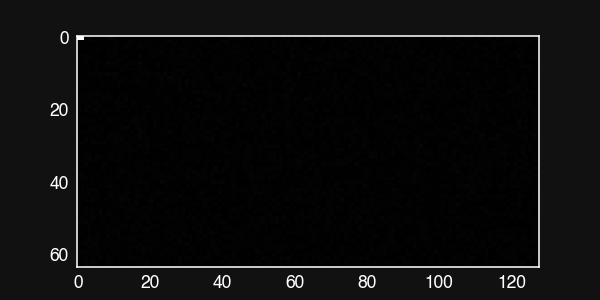

In [5]:
s = yp.changeBackend((np.random.rand(image_size[0], image_size[1]) + 1j * np.random.rand(image_size[0], image_size[1])).astype(np.complex64))
W = ops.WaveletTransform(image_size, wavelet_type=wavelet_test)
s_w = W * s

plt.figure(figsize=(6,3))
plt.imshow(yp.abs(yp.reshape(s_w,image_size)))